# Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of
rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a
report on that.

Dataset Link:
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3
classes based on the type of disease. There are 40 images in each class.
Classes
● Leaf smut
● Brown spot
● Bacterial leaf blight

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


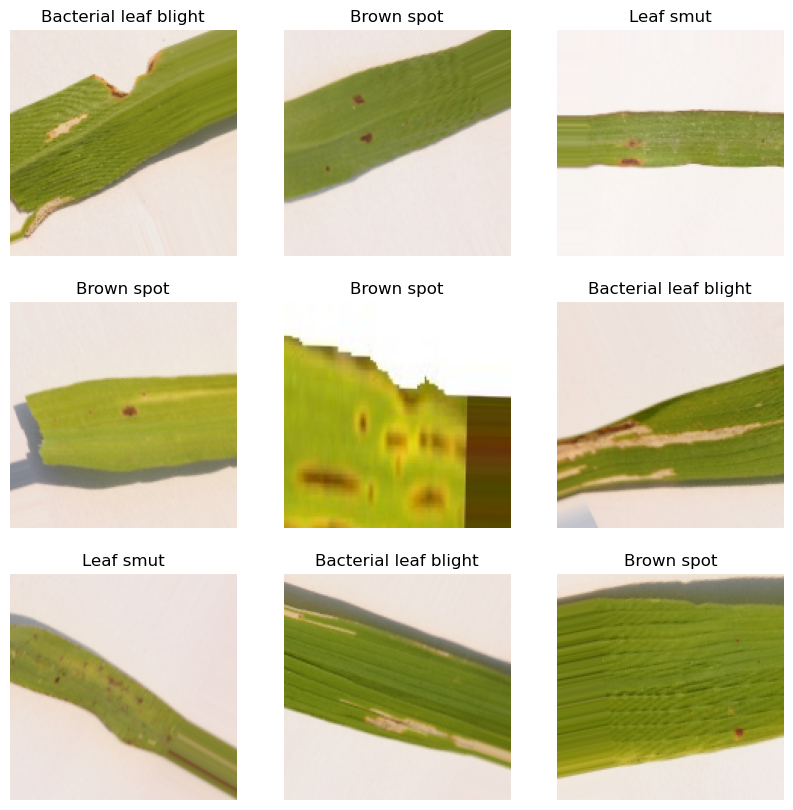

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.1444 - accuracy: 0.2400 - val_loss: 1.0928 - val_accuracy: 0.4286
Epoch 2/20
1/1 [==============================] - 1s 933ms/step - loss: 1.0570 - accuracy: 0.4000 - val_loss: 1.0802 - val_accuracy: 0.4286
Epoch 3/20
1/1 [==============================] - 1s 870ms/step - loss: 1.0795 - accuracy: 0.3600 - val_loss: 1.0750 - val_accuracy: 0.4286
Epoch 4/20
1/1 [==============================] - 1s 865ms/step - loss: 1.1516 - accuracy: 0.3600 - val_loss: 1.0696 - val_accuracy: 0.4286
Epoch 5/20
1/1 [==============================] - 1s 868ms/step - loss: 1.1115 - accuracy: 0.3600 - val_loss: 1.0692 - val_accuracy: 0.4286
Epoch 6/20
1/1 [==============================] - 1s 865ms/step - loss: 1.1977 - accuracy: 0.2400 - val_loss: 1.0628 - val_accuracy: 0.5714
Epoch 7/20
1/1 [==============================] - 1s 897ms/step - loss: 1.2757 - accuracy: 0.2800 - val_loss: 1.0600 - val_accuracy: 0.5714
Epoch 8/20
1/1 [=======

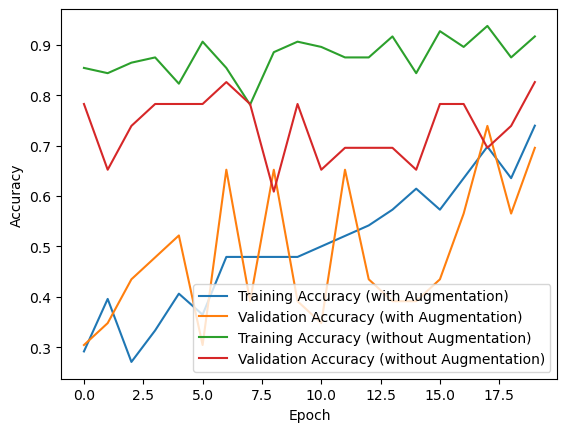

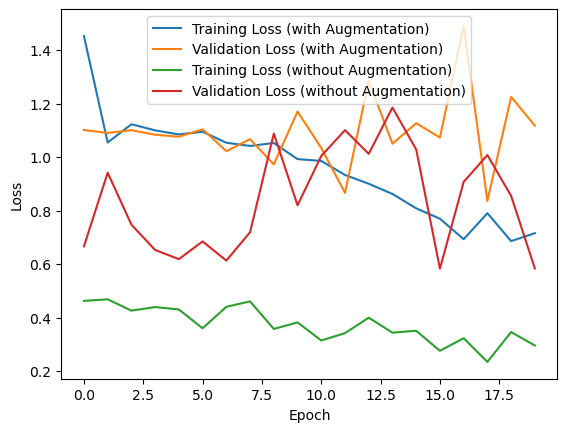

1/1 [==============================] - 1s 1s/step - loss: 0.4955 - accuracy: 0.7826
Test Loss (without Augmentation): 0.495482861995697
Test Accuracy (without Augmentation): 0.782608687877655
1/1 [==============================] - 1s 1s/step
Confusion Matrix (without Augmentation):
[[6 1 1]
 [1 3 4]
 [0 1 6]]
Classification Report (without Augmentation):
                       precision    recall  f1-score   support

Bacterial leaf blight       0.86      0.75      0.80         8
           Brown spot       0.60      0.38      0.46         8
            Leaf smut       0.55      0.86      0.67         7

             accuracy                           0.65        23
            macro avg       0.67      0.66      0.64        23
         weighted avg       0.67      0.65      0.64        23



In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Task 1: Data Analysis Report

# Define the dataset directory and other parameters
dataset_directory = "C:/Users/ryzen 5/OneDrive/Desktop/dataset"
IMAGE_SIZE = 150
BATCH_SIZE = 32
num_classes = 3  # Three major attacking diseases of rice plants

# Use ImageDataGenerator for data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Load and preprocess the data
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=123
)

# Visualize some sample images
def plot_sample_images(generator, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        image, label = generator.next()
        plt.imshow(image[0])
        plt.title(list(train_generator.class_indices.keys())[np.argmax(label[0])])
        plt.axis("off")
    plt.show()

# Plot sample training images
plot_sample_images(train_generator)


# Task 2: Model Creation for Classification

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')]
)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjusted learning rate
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Split the dataset into training, validation, and test sets
train_data, val_data, train_labels, val_labels = train_test_split(
    train_generator[0][0], train_generator[0][1], test_size=0.2, random_state=42
)

# Train the model
epochs = 20  # Increased number of epochs
history = model.fit(train_data, train_labels, epochs=epochs, validation_data=(val_data, val_labels))

# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=123
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Task 3: Analysis of Techniques like Data Augmentation

# Define the ImageDataGenerators for data augmentation and without augmentation
datagen_augmentation = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

datagen_no_augmentation = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

# Create the data generators for training, validation, and testing
train_generator_augmentation = datagen_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

train_generator_no_augmentation = datagen_no_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

validation_generator = datagen_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=123
)

test_generator_augmentation = datagen_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=123
)

# Define and compile the model with data augmentation
model_augmentation = tf.keras.models.clone_model(model)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
model_augmentation.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# ... Previous code ...

# Train the model with data augmentation
epochs = 20
history_augmentation = model_augmentation.fit(
    train_generator_augmentation,
    epochs=epochs,
    validation_data=validation_generator
)

# Train the model without data augmentation
history_no_augmentation = model_no_augmentation.fit(
    train_generator_no_augmentation,
    epochs=epochs,
    validation_data=validation_generator
)

# Visualize the training and validation accuracy/loss with and without augmentation
plt.plot(history_augmentation.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_augmentation.history['val_accuracy'], label='Validation Accuracy (with Augmentation)')
plt.plot(history_no_augmentation.history['accuracy'], label='Training Accuracy (without Augmentation)')
plt.plot(history_no_augmentation.history['val_accuracy'], label='Validation Accuracy (without Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_augmentation.history['loss'], label='Training Loss (with Augmentation)')
plt.plot(history_augmentation.history['val_loss'], label='Validation Loss (with Augmentation)')
plt.plot(history_no_augmentation.history['loss'], label='Training Loss (without Augmentation)')
plt.plot(history_no_augmentation.history['val_loss'], label='Validation Loss (without Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model without data augmentation on the test set
test_loss_no_aug, test_accuracy_no_aug = model_no_augmentation.evaluate(test_generator_augmentation)
print("Test Loss (without Augmentation):", test_loss_no_aug)
print("Test Accuracy (without Augmentation):", test_accuracy_no_aug)

# Print classification report and confusion matrix for the model without data augmentation
y_pred_no_aug = model_no_augmentation.predict(test_generator_augmentation)
y_pred_labels_no_aug = np.argmax(y_pred_no_aug, axis=1)

conf_matrix_no_aug = confusion_matrix(true_labels, y_pred_labels_no_aug)
class_report_no_aug = classification_report(true_labels, y_pred_labels_no_aug, target_names=test_generator_augmentation.class_indices.keys())

print("Confusion Matrix (without Augmentation):")
print(conf_matrix_no_aug)

print("Classification Report (without Augmentation):")
print(class_report_no_aug)




In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Task 1: Data Analysis Report

# Define the dataset directory and other parameters
dataset_directory = "C:/Users/ryzen 5/OneDrive/Desktop/dataset"
IMAGE_SIZE = 150
BATCH_SIZE = 32
num_classes = 3  # Three major attacking diseases of rice plants

# Use ImageDataGenerator for data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Load and preprocess the data
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=123
)

# Visualize some sample images
def plot_sample_images(generator, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        image, label = generator.next()
        plt.imshow(image[0])
        plt.title(list(train_generator.class_indices.keys())[np.argmax(label[0])])
        plt.axis("off")
    plt.show()

# Plot sample training images
plot_sample_images(train_generator)


# Task 2: Model Creation for Classification

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')]
)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjusted learning rate
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Split the dataset into training, validation, and test sets
train_data, val_data, train_labels, val_labels = train_test_split(
    train_generator[0][0], train_generator[0][1], test_size=0.2, random_state=42
)

# Train the model
epochs = 20  # Increased number of epochs
history = model.fit(train_data, train_labels, epochs=epochs, validation_data=(val_data, val_labels))

# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=123
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Task 3: Analysis of Techniques like Data Augmentation

# Define the ImageDataGenerators for data augmentation and without augmentation
datagen_augmentation = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

datagen_no_augmentation = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

# Create the data generators for training, validation, and testing
train_generator_augmentation = datagen_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

train_generator_no_augmentation = datagen_no_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

validation_generator = datagen_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=123
)

test_generator = datagen_augmentation.flow_from_directory(
    dataset_directory,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=1,  # Set batch_size to 1 to get correct predictions for confusion matrix
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=123
)

# Define and compile the model with data augmentation
model_augmentation = tf.keras.models.Sequential([
    # ... Layers as defined before ...
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']
model_augmentation.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with data augmentation
epochs = 20
steps_per_epoch = train_generator_augmentation.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

history_augmentation = model_augmentation.fit(
    train_generator_augmentation,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Define and compile the model without data augmentation
model_no_augmentation = tf.keras.models.clone_model(model_augmentation)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjusted learning rate
model_no_augmentation.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model without data augmentation
history_no_augmentation = model_no_augmentation.fit(
    train_generator_no_augmentation,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Visualize the training and validation accuracy/loss with and without augmentation
plt.plot(history_augmentation.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_augmentation.history['val_accuracy'], label='Validation Accuracy (with Augmentation)')
plt.plot(history_no_augmentation.history['accuracy'], label='Training Accuracy (without Augmentation)')
plt.plot(history_no_augmentation.history['val_accuracy'], label='Validation Accuracy (without Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_augmentation.history['loss'], label='Training Loss (with Augmentation)')
plt.plot(history_augmentation.history['val_loss'], label='Validation Loss (with Augmentation)')
plt.plot(history_no_augmentation.history['loss'], label='Training Loss (without Augmentation)')
plt.plot(history_no_augmentation.history['val_loss'], label='Validation Loss (without Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print classification report and confusion matrix
true_labels = test_generator.classes
y_pred = model_augmentation.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(true_labels, y_pred_labels)
class_report = classification_report(true_labels, y_pred_labels, target_names=test_generator.class_indices.keys())

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)
